In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format


In [16]:
data = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Data/train.csv')
df = data.copy()

In [17]:
df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [18]:
df.value_counts(df['family'])

family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [19]:
df['family'].nunique()

33

In [45]:
store_sales = df.groupby(['store_nbr'])['sales'].sum().reset_index()
store_sales = store_sales.rename({'sales': 'total_sales'}, axis= 1)
store_sales.head()

,store_nbr,total_sales
0,1,14145012.870
1,2,21557388.645
2,3,50481910.185
3,4,18909700.380
4,5,15592404.572


<BarContainer object of 54 artists>

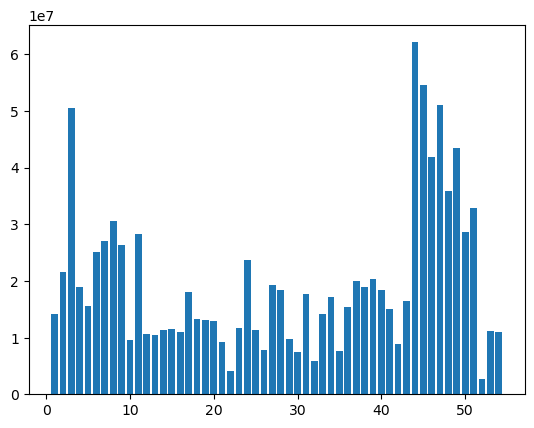

In [47]:
plt.bar(store_sales['store_nbr'],store_sales['total_sales'])

In [50]:
store_data = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Data/stores.csv')
store_df = store_data.copy()

In [58]:
store_df.head(20)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
store_df['city'].unique()

In [ ]:
counts = store_df['cluster'].value_counts()
counts

In [70]:
city_counts = store_df['city'].value_counts()
city_counts

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [66]:
merged_df = df.merge(store_df, on= 'store_nbr', how= 'left')

In [67]:
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13


In [71]:
by_city = merged_df.groupby(merged_df['city'])['sales'].sum().reset_index()
by_city

,city,sales
0,Ambato,40304401.300
1,Babahoyo,17746872.702
2,Cayambe,28325558.481
3,Cuenca,49168596.033
4,Daule,19188021.382
5,El Carmen,11057483.118
6,Esmeraldas,16391692.212
7,Guaranda,13049509.837
8,Guayaquil,122967260.482
9,Ibarra,11451270.023


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Ambato'),
  Text(1, 0, 'Babahoyo'),
  Text(2, 0, 'Cayambe'),
  Text(3, 0, 'Cuenca'),
  Text(4, 0, 'Daule'),
  Text(5, 0, 'El Carmen'),
  Text(6, 0, 'Esmeraldas'),
  Text(7, 0, 'Guaranda'),
  Text(8, 0, 'Guayaquil'),
  Text(9, 0, 'Ibarra'),
  Text(10, 0, 'Latacunga'),
  Text(11, 0, 'Libertad'),
  Text(12, 0, 'Loja'),
  Text(13, 0, 'Machala'),
  Text(14, 0, 'Manta'),
  Text(15, 0, 'Playas'),
  Text(16, 0, 'Puyo'),
  Text(17, 0, 'Quevedo'),
  Text(18, 0, 'Quito'),
  Text(19, 0, 'Riobamba'),
  Text(20, 0, 'Salinas'),
  Text(21, 0, 'Santo Domingo')])

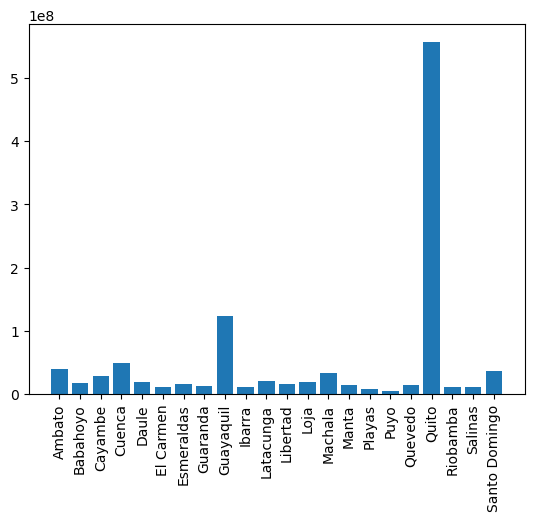

In [73]:
plt.bar(by_city['city'], by_city['sales'])
plt.xticks(rotation = 90)

In [74]:
merged_df.to_csv('merged_df.csv', index= True)